In [1]:
import scipy as sp
import numpy as np
import scipy.linalg as sla
import scipy.sparse as sps
import scipy.sparse.linalg as spla

import matplotlib.pyplot as plt
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# PCA

We have a object - feature matrix $F$ of size l x n,

For the PCA the main task is to find such weight matrix $W$ such that 

$$
G = FW, s.t. \ \  \ ||GW^T - F||^2 -> min
$$

where $G$ - matrix of principle components of $F$ of size l x m, $W$ is transformation matrix of size n x m from old features to new.

Columns of matrix $W$ represent principal axis in the feature space.



In [37]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
print(__doc__)

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)

features = pd.DataFrame(load_wine(return_X_y=False)['data'],
                        columns=load_wine(return_X_y=False)['feature_names'])

target = load_wine(return_X_y=False)['target']
features.head(5)

Automatically created module for IPython interactive environment


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Automatically created module for IPython interactive environment

PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


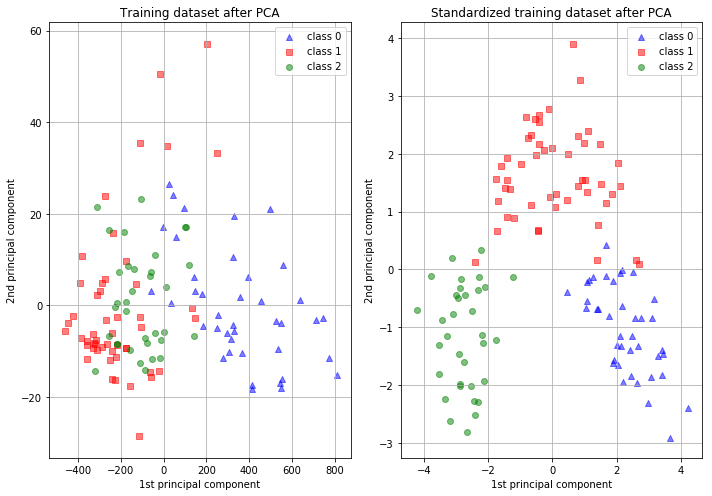

In [39]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
print(__doc__)

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=None))
unscaled_clf.fit(X_train, y_train)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=None))
std_clf.fit(X_train, y_train)


# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal components
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

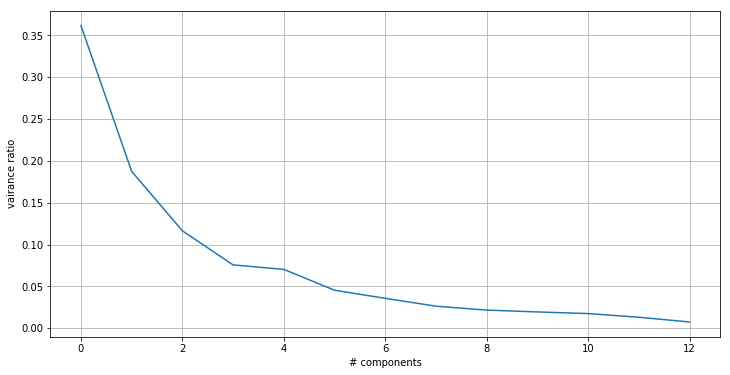

In [45]:
plt.figure(figsize=(12,6))
plt.plot(range(pca_std.n_components_), pca_std.explained_variance_ratio_)
plt.ylabel("vairance ratio")
plt.xlabel("# components")
plt.grid()

# SVD decomposition

if M is m x n matrix over field K, there is exists factorisation of it:

$$
M = U * S * V^{\dagger}, where
$$
- $U$ - is m x m unitary matrix over K,
- $S$ - is diagonal m x n matrix with non-negative real numbers,
- $V$ - is n x n unitary matrix over K.

The values $s_i$ of matrix S are known as singular values of M.
This decomposition is called Singular Value Decomposition - SVD.

Columns of $U$ anv $V$ are called left and right singular vectors of $M$:
$$
M v = s u, \
M^{\dagger} u = sv
$$

Various application in mathematics and optimisation - pseudo-inverse computation, low rank factorisation, application in solving systems of equations ...

If we define matrix $M$ to be $F$, and 

$$
G = U * S,
$$

we will get full PCA decomposition, where weight matrix $W$ is now $V$.

So, to get first K principal components we will just take first K columns of matrix $S * U$.

We can also look at those components in the initial basis of M. To do that we multiply them to the firt K rows of matrix $V^{\dagger}$.


In [5]:
from PIL import Image
from scipy import misc


img = misc.imread(r'swisscows_edit.jpg', mode='L') # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD
img.shape

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


(600, 800)

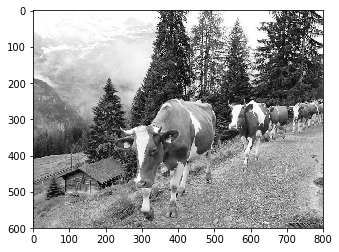

In [3]:
imgplot = plt.imshow(img, cmap='Greys_r')

# PCA via SVD for compression

In [4]:
U, s, V_h = sla.svd(img, full_matrices=False)
pca_1 = ((U[:,0]*s[0]).reshape(U.shape[0],1)).dot(V_h[0,:].reshape(1,V_h.shape[1]))
pca_1.shape
#pca_1_20 = ((U[0:19,:]*S[0]).reshape(U.shape[0],1)).dot(V_h[0,:].reshape(1,V_h.shape[1]))

(600, 800)

In [11]:
U, s, V_h = sla.svd(img, full_matrices=False)
def PCA(start_component = 0, end_component = 1, U = U, s = s, V_h = V_h):
    num_of_cols = end_component - start_component
    US = (U[:,start_component:end_component]*s[start_component:end_component]).reshape(U.shape[0],num_of_cols)
    return US.dot(V_h[start_component:end_component,:].reshape(num_of_cols,V_h.shape[1]))

In [12]:
pca_1 = PCA()
pca_1_20 = PCA(end_component=20)
pca_1_50 = PCA(end_component=50)
pca_20_100 = PCA(20, 100)
pca_20_end = PCA(20, 384)
#pca_full = PCA(0, 384)

Text(0.5, 1.0, '20-end PCA')

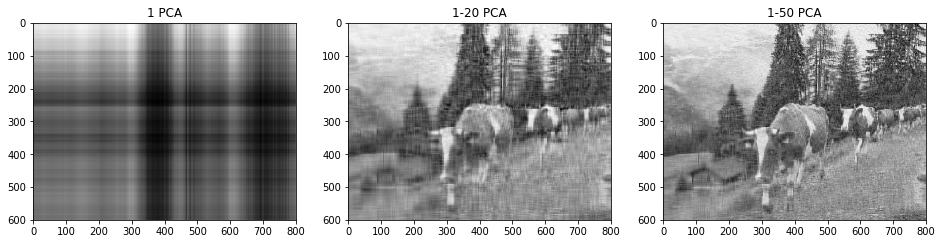

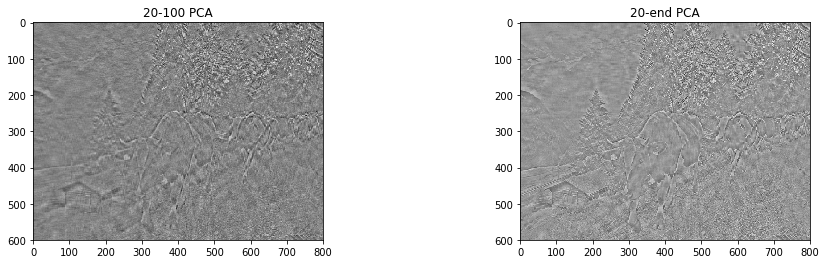

In [13]:
plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
imgplot = plt.imshow(pca_1, cmap='Greys_r')
plt.title("1 PCA")

plt.subplot(1,3,2)
imgplot = plt.imshow(pca_1_20, cmap='Greys_r')
plt.title("1-20 PCA")

plt.subplot(1,3,3)
imgplot = plt.imshow(pca_1_50, cmap='Greys_r')
plt.title("1-50 PCA")

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
imgplot = plt.imshow(pca_20_100, cmap='Greys_r')
plt.title("20-100 PCA")

plt.subplot(1,2,2)
imgplot = plt.imshow(pca_20_end, cmap='Greys_r')
plt.title("20-end PCA")

### What do you think 1st PCA component reflects? How do you find, is 1-50 components gives you a good image?

In [24]:
img.shape

(600, 800)

First components reflects the biggest the place where one global objects transfers to another. At this place, the biggest gradient change happen.

Using first components of the image, it is possible to compress it in size ie.

using first K components will give memory gain

$$
\frac{N_{rows} * N_{cols}}{K * (N_{rows}  + N_{cols})}
$$

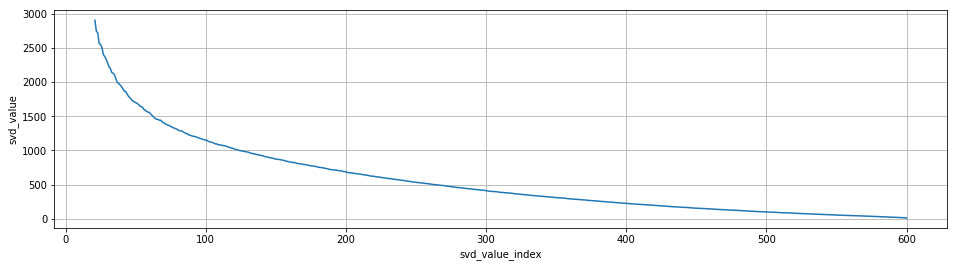

In [17]:
plt.figure(figsize=(16, 4))
plt.plot(range(21, 601), s[20:])
plt.xlabel("svd_value_index")
plt.ylabel("svd_value")
plt.grid()
#plt.xlim(0,1)